# Diabetic Retinopathy Visualization Experiments

Visualizing the sample images from the [Kaggle competition](https://www.kaggle.com/c/diabetic-retinopathy-detection/data).

One [participant](https://github.com/hoytak/diabetic-retinopathy-code) pre-processed the images using ImageMagick. I've adopted his ideas for pre-processing, and added a few of my own.

In [71]:
%matplotlib inline

import typing

from os.path import join, exists, isdir, isfile, split

import numpy as np
from skimage import data
from IPython.display import Image, display

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
matplotlib.style.use('ggplot')

In [39]:
im = data.imread('sample/10_left.jpeg')
im1 = data.imread('sample/10_left_conv.jpeg')
im2 = data.imread('sample/10_left_conv_2.jpeg')
msg = 'Image 10 {}'

## Image processing of the sample files

Let's look at the original image first.

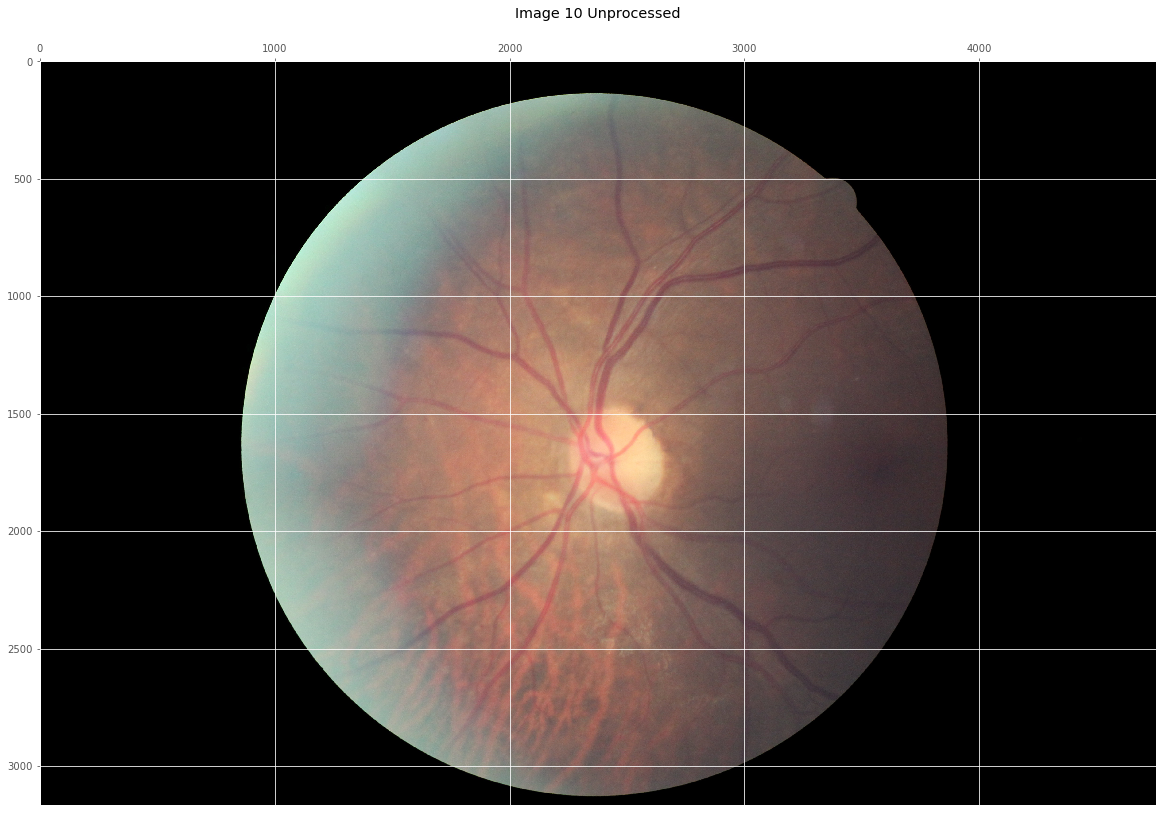

In [58]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
ax.imshow(im)
ax.set_title(msg.format('Unprocessed'), y=1.05)
ax.xaxis.tick_top()
plt.imshow(im);

Now let's look at two processed images. I used the ```convert``` command-line program that comes with ImageMagick.

```bash
convert -fuzz 10% -trim +repage -resize 256x256 -gravity center -background black -extent 256x256 -equalize 10_left.jpeg 10_left_conv.jpeg
```

Recall that the images are a tensor of size ```(3168, 4752, 3)```, for example. The data structure is a tensor since it has a third dimension, the *channel*, which is red, green, or blue. For each channel, the matrix has entries from 0 to 255, indicating the color.

The ```fuzz``` option has the effect that colors within this distance are considered equal.

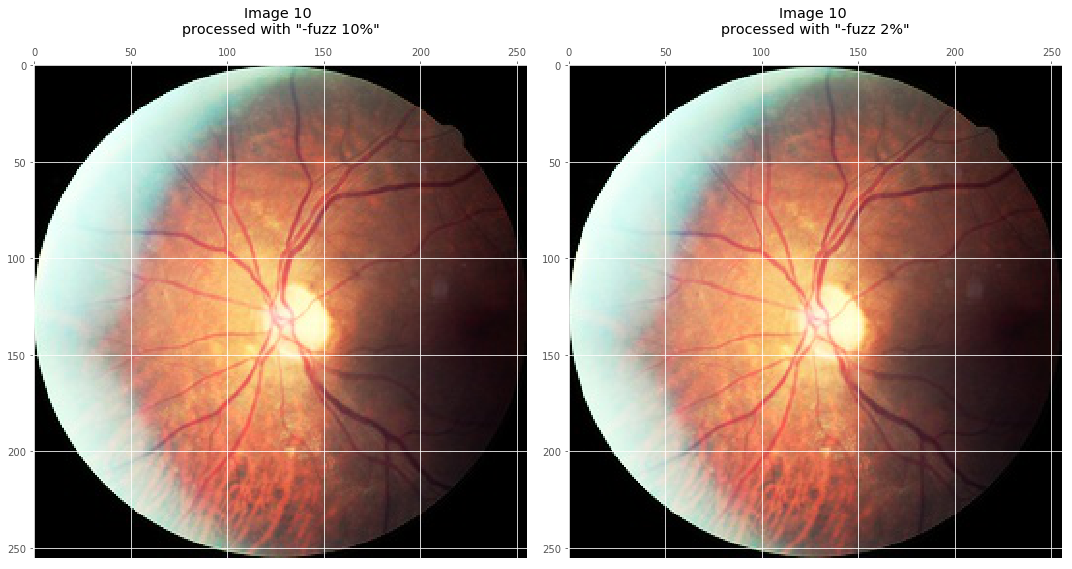

In [59]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
ax[0].imshow(im1);
ax[0].set_title(msg.format('\nprocessed with "-fuzz 10%"'), y=1.05)
ax[0].xaxis.tick_top()
ax[1].imshow(im2);
ax[1].set_title(msg.format('\nprocessed with "-fuzz 2%"'), y=1.05)
ax[1].xaxis.tick_top()
plt.tight_layout()

This is interesting, but let's compare each processed image to the unprocessed one.

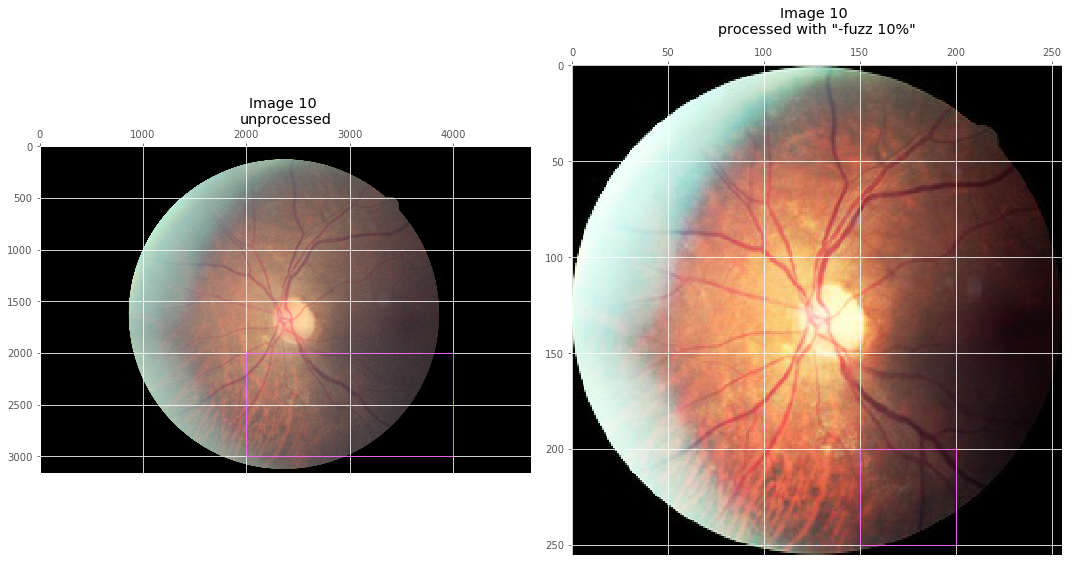

In [86]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
ax[0].imshow(im);
ax[0].set_title(msg.format('\nunprocessed'), y=1.05)
ax[0].xaxis.tick_top()
ax[0].add_artist(patches.Rectangle((2000, 2000), 2000, 1000, alpha=2, fill=False, edgecolor='magenta'))
ax[1].imshow(im1);
ax[1].set_title(msg.format('\nprocessed with "-fuzz 10%"'), y=1.05)
ax[1].xaxis.tick_top()
ax[1].add_artist(patches.Rectangle((150, 200), 50, 50, alpha=2, fill=False,
                                  edgecolor='magenta'))
plt.tight_layout()

Other than the obvious size difference, we can see the blood vessels are brighter in the processed image, and we can also see a blood vessel in the lower right of the processed image that doesn't appear in the original. Also, the image overall is a brighter.

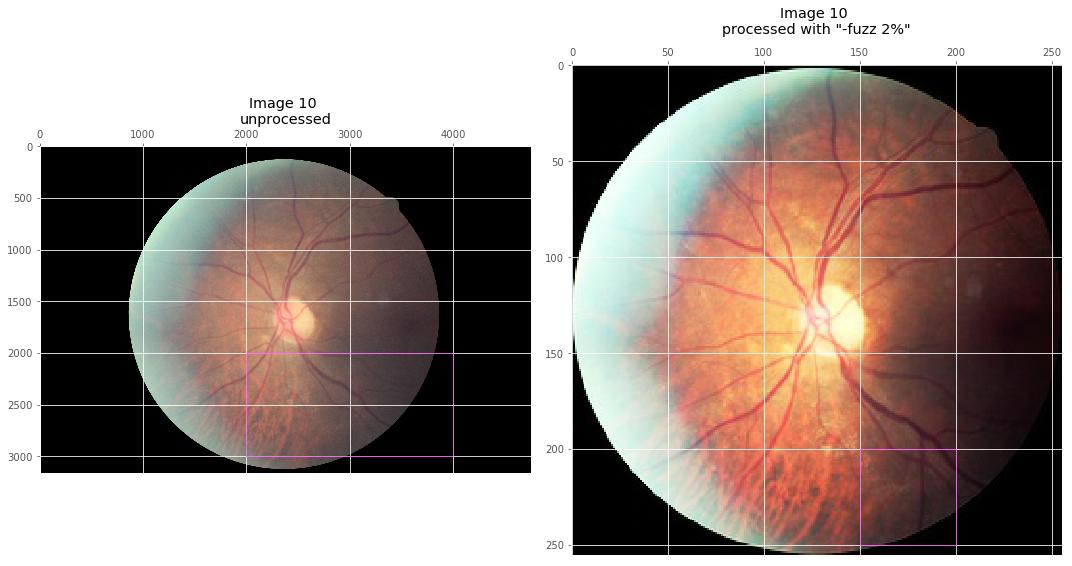

In [87]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
ax[0].imshow(im);
ax[0].set_title(msg.format('\nunprocessed'), y=1.05)
ax[0].xaxis.tick_top()
ax[0].add_artist(patches.Rectangle((2000, 2000), 2000, 1000, alpha=2, fill=False, edgecolor='magenta'))
ax[1].imshow(im2);
ax[1].set_title(msg.format('\nprocessed with "-fuzz 2%"'), y=1.05)
ax[1].xaxis.tick_top()
ax[1].add_artist(patches.Rectangle((150, 200), 50, 50, alpha=2, fill=False,
                                  edgecolor='magenta'))
plt.tight_layout()

There does not seem to be much difference between 10% and 2%.

We can see all the sample images using the following code. Just run

```python
show_eyes()
```

In [30]:
def load_left_right(i: int) -> typing.Tuple[np.ndarray, np.ndarray]:
    left_file_name = join('sample', '{}_left.jpeg'.format(i))
    right_file_name = join('sample', '{}_right.jpeg'.format(i))
    return data.imread(left_file_name), data.imread(right_file_name)

In [36]:
def show_eyes() -> None:
    img_idx = [10, 13, 15, 16, 17]
    for i in img_idx:
        im_l, im_r = load_left_right(i)
        fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
        ax[0].imshow(im_l)
        ax[0].set_title('Left eye')
        ax[0].xaxis.tick_top()
        ax[1].imshow(im_r)
        ax[1].set_title('Right eye')
        ax[1].xaxis.tick_top()

## Note: the below code is a set of experiments and should not be run

In [9]:
im_l = data.imread('sample/10_left.jpeg')
im_r = data.imread('sample/10_right.jpeg')

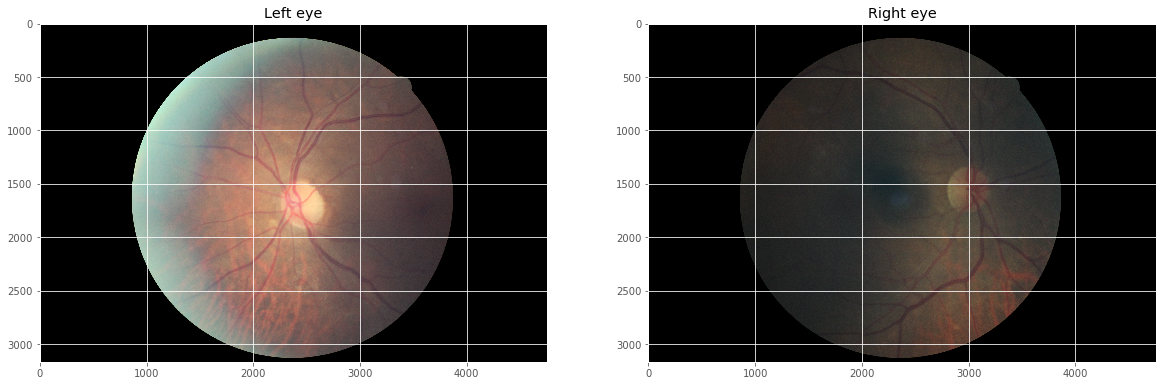

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,16))
ax[0].imshow(im_l)
ax[0].set_title('Left eye')
ax[1].imshow(im_r)
ax[1].set_title('Right eye')

In [60]:
im_l.shape

(3168, 4752, 3)

In [63]:
im_l[1000, 2000, 0]

159

IndexError: index 3 is out of bounds for axis 2 with size 3